In [2]:
!pip install fireTS
import numpy as np
from sklearn.linear_model import LinearRegression
from fireTS.models import NARX
from google.colab import drive

drive.mount('drive')

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Mounted at drive


Saving akarsu_relevant_acısu.csv to akarsu_relevant_acısu.csv
User uploaded file "akarsu_relevant_acısu.csv" with length 9393 bytes


         Date  Amonyum_Azotu  Askıda_Katı_Madde  Çözünmüş_Oksijen  \
93  12/1/2018        0.28807            0.04185           0.01606   
94   8/1/2020        0.06648            0.02597           0.50443   
95   9/1/2020        0.06648            0.02597           0.75178   
96  11/1/2020        0.06648            0.02597           0.55303   
97  12/1/2020        0.06648            0.02597           0.62246   

    Elektriksel_İletkenlik  Fekal_Koliform  Toplam_Koliform  Toplam_Fosfor  \
93                 0.18230         0.00325          0.00335        0.23263   
94                 0.62804         0.01200          0.10000        0.05379   
95                 0.75996         0.03000          0.25000        0.03326   
96                 0.94344         0.01000          0.22500        0.06105   
97                 0.88853         0.00950          0.15375        0.03053   

    Toplam_Kjeldahl_Azotu  Toplam_Pestisit  Kimyasal_Oksijen_İhtiyacı      pH  \
93                0.02764          

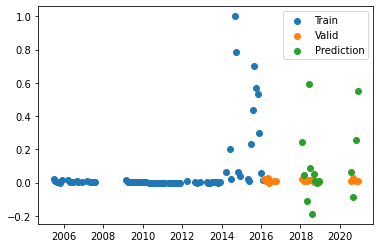

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
akarsu_df = pd.read_csv('akarsu_relevant_acısu.csv',  low_memory=False)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

#akarsu_cols = ['Fekal_Koliform', 'Toplam_Koliform', 'Toplam_Fosfor', 'Toplam_Kjeldahl_Azotu', 'Kimyasal_Oksijen_İhtiyacı', 'Nitrat_Azotu', 'Çözünmüş_Oksijen']


# Scale features
akarsu_scaled = akarsu_df.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for i in akarsu_df.columns.drop('Date'):
    akarsu_scaled[[i]] = scaler.fit_transform(akarsu_df[[i]])
print(akarsu_scaled.tail(5))
akarsu_scaled.index = pd.to_datetime(akarsu_scaled['Date'], yearfirst = True)

split = int(akarsu_scaled.shape[0] *0.8)
train = akarsu_scaled[:split]
test = akarsu_scaled[split:]

#train_X, train_y = train[:-1], train[-1]
train_X, train_y = train.loc[:, [ 'Toplam_Koliform', 'Toplam_Fosfor', 
                                 'Toplam_Kjeldahl_Azotu', 'Kimyasal_Oksijen_İhtiyacı', 'Nitrat_Azotu', 'Çözünmüş_Oksijen'] ],train['Fekal_Koliform']

test_X, test_y = test.loc[:, [ 'Toplam_Koliform', 'Toplam_Fosfor', 
                                 'Toplam_Kjeldahl_Azotu', 'Kimyasal_Oksijen_İhtiyacı', 'Nitrat_Azotu', 'Çözünmüş_Oksijen']], test['Fekal_Koliform']
print((test_X.shape, test_y.shape, len(x_train.columns)))

mdl = NARX(LinearRegression(), auto_order=len(train_X.columns), exog_order=[6,6,6,6,6,6], exog_delay=[ 0,0,0,0,0,0])
#para_grid = {'n_estimators': [10, 30, 100]}
#mdl.grid_search(train_X,train_y, para_grid, verbose=2)
mdl.fit(train_X, train_y)

forecast = mdl.predict(test_X, test_y, step=1)
forecast = pd.DataFrame(forecast,index =test.index,columns=['Prediction'])
#y_forecast = mdl.forecast(test_X, test_y, step=10, X_future=forecast)


plt.scatter(train_y.index,train_y, label='Train')
plt.scatter(test_y.index, test_y, label='Valid')
plt.scatter(forecast.index,forecast,  label='Prediction')
plt.legend()







